<a href="https://colab.research.google.com/github/maybje/CE888/blob/master/lab7/Excercise_1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import layers
from keras import models

Using TensorFlow backend.


Importantly, a convnet takes as input tensors of shape (image_height, image_width, image_channels) (not including the batch dimension). In this case, we’ll configure the convnet to process inputs of size (28, 28, 1), which is the format of MNIST images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first layer.

**Instantiating a small convnet**

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


**Adding a classifier on top of the convnet**

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

### **Training the convnet on MNIST images**

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

**Load Data**

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/5





48000/48000 [==============================] - 17s 359us/step - loss: 0.2074 - acc: 0.9342 - val_loss: 0.0578 - val_acc: 0.9829
Epoch 2/5
48000/48000 [==============================] - 4s 75us/step - loss: 0.0563 - acc: 0.9829 - val_loss: 0.0584 - val_acc: 0.9824
Epoch 3/5
48000/48000 [==============================] - 4s 75us/step - loss: 0.0389 - acc: 0.9878 - val_loss: 0.0458 - val_acc: 0.9870
Epoch 4/5
48000/48000 [==============================] - 3s 72us/step - loss: 0.0278 - acc: 0.9914 - val_loss: 0.0430 - val_acc: 0.9879
Epoch 5/5
48000/48000 [==============================] - 3s 72us/step - loss: 0.0224 - acc: 0.9928 - val_loss: 0.0421 - val_acc: 0.9892


**Evaluate model**

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 50us/step


0.9884

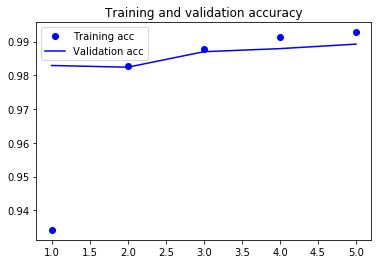

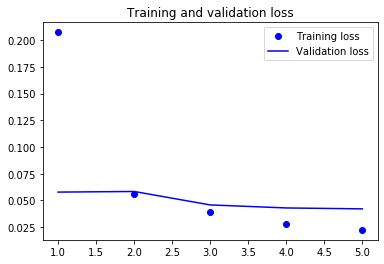

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Exercise**:

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance.

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [0]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=100, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 61us/step - loss: 0.0173 - acc: 0.9950 - val_loss: 0.0395 - val_acc: 0.9889
Epoch 2/10
48000/48000 [==============================] - 3s 52us/step - loss: 0.0149 - acc: 0.9958 - val_loss: 0.0462 - val_acc: 0.9873
Epoch 3/10
48000/48000 [==============================] - 2s 51us/step - loss: 0.0133 - acc: 0.9959 - val_loss: 0.0448 - val_acc: 0.9869
Epoch 4/10
48000/48000 [==============================] - 3s 54us/step - loss: 0.0127 - acc: 0.9963 - val_loss: 0.0431 - val_acc: 0.9887
Epoch 5/10
48000/48000 [==============================] - 2s 51us/step - loss: 0.0114 - acc: 0.9970 - val_loss: 0.0410 - val_acc: 0.9890
Epoch 6/10
48000/48000 [==============================] - 3s 53us/step - loss: 0.0100 - acc: 0.9974 - val_loss: 0.0471 - val_acc: 0.9868
Epoch 7/10
48000/48000 [==============================] - 3s 52us/step - loss: 0.0092 - acc: 0.9976 - val_loss: 0.0417 - val_acc

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 55us/step


0.9901